In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/amazon-product-review-spam-and-non-spam/Home_and_Kitchen/Home_and_Kitchen.json
/kaggle/input/amazon-product-review-spam-and-non-spam/part.json/part.json
/kaggle/input/amazon-product-review-spam-and-non-spam/Electronics/Electronics.json
/kaggle/input/amazon-product-review-spam-and-non-spam/separate.json/separate.json
/kaggle/input/amazon-product-review-spam-and-non-spam/Clothing_Shoes_and_Jewelry/Clothing_Shoes_and_Jewelry.json
/kaggle/input/amazon-product-review-spam-and-non-spam/Sports_and_Outdoors/Sports_and_Outdoors.json
/kaggle/input/amazon-product-review-spam-and-non-spam/Cell_Phones_and_Accessories/Cell_Phones_and_Accessories.json
/kaggle/input/amazon-product-review-spam-and-non-spam/Toys_and_Games/Toys_and_Games.json


for importing json file so that we don't get any error in loading. 

In [2]:
import json 
from pandas.io.json import json_normalize

In [3]:
N = 1000000
with open('../input/amazon-product-review-spam-and-non-spam/Cell_Phones_and_Accessories/Cell_Phones_and_Accessories.json') as json_file:
    data = [next(json_file) for x in range(N)]
    data = list(map(json.loads, data)) 

For changing the file format like _id-$oid to id and list in helpful to helpfull and not helpfull.

In [4]:
for result in data:
    result['id'] = result['_id']['$oid']
    result['helpfull'] = result['helpful'][0]
    result['not_helpfull'] = result['helpful'][1]
    del result['helpful']
    del result['_id']

json to pandas dataframe and then dropping the rows which contains null values

In [5]:
df = pd.DataFrame(data) 
df = df.dropna()
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,id,helpfull,not_helpfull
0,A3HVRXV0LVJN7,0110400550,BiancaNicole,Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200,"01 13, 2013",Cell_Phones_and_Accessories,1.0,5a1321d5741a2384e802c552,4,4
1,A1BJGDS0L1IO6I,0110400550,"cf ""t""",ITEM NOT SENT from Blue Top Company in Hong Ko...,1.0,ITEM NOT SENT!!,1359504000,"01 30, 2013",Cell_Phones_and_Accessories,0.0,5a1321d5741a2384e802c557,0,3
2,A1YX2RBMS1L9L,0110400550,Andrea Busch,Saw this same case at a theme park store for 2...,5.0,Great product,1353542400,"11 22, 2012",Cell_Phones_and_Accessories,1.0,5a1321d5741a2384e802c550,0,0
3,A180NNPPKWCCU0,0110400550,Aniya pennington,case fits perfectly and I always gets complime...,5.0,Perfect,1374105600,"07 18, 2013",Cell_Phones_and_Accessories,1.0,5a1321d5741a2384e802c553,3,3
4,A30P2CYOUYAJM8,0110400550,Gene,I got this for my 14 year old sister. She lov...,4.0,Cool purchase.,1363737600,"03 20, 2013",Cell_Phones_and_Accessories,1.0,5a1321d5741a2384e802c559,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993759 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      993759 non-null  object 
 1   asin            993759 non-null  object 
 2   reviewerName    993759 non-null  object 
 3   reviewText      993759 non-null  object 
 4   overall         993759 non-null  float64
 5   summary         993759 non-null  object 
 6   unixReviewTime  993759 non-null  int64  
 7   reviewTime      993759 non-null  object 
 8   category        993759 non-null  object 
 9   class           993759 non-null  float64
 10  id              993759 non-null  object 
 11  helpfull        993759 non-null  int64  
 12  not_helpfull    993759 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 106.1+ MB


In [7]:
df.corr()

,overall,unixReviewTime,class,helpfull,not_helpfull
overall,1.000000,0.027549,0.910217,-0.009687,-0.024900
unixReviewTime,0.027549,1.000000,0.016142,-0.105645,-0.122660
class,0.910217,0.016142,1.000000,-0.006871,-0.020781
helpfull,-0.009687,-0.105645,-0.006871,1.000000,0.990947
not_helpfull,-0.024900,-0.122660,-0.020781,0.990947,1.000000


In [8]:
df[df['not_helpfull']==0].value_counts()

reviewerID            asin        reviewerName      reviewText                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             overall  summary                                                                                        unixReviewTime  reviewTime   category                     class  id                        helpfull  not_helpfull
A0004478EF5NFPHLGCWG  B004MG8KCS  STEPHANIE FIELDS  Just for show, not very durable, or a of great protection.  Colorful and easy to coordinate, with clothes.  Enjoyed by everyone.                                               

In [9]:
df = df.drop(["asin","reviewerName","category","id"],axis = 1)

In [10]:
df["review"]=df["reviewText"]
df = df.drop(["reviewText","summary"],axis=1)
df.head()

,reviewerID,overall,unixReviewTime,reviewTime,class,helpfull,not_helpfull,review
0,A3HVRXV0LVJN7,5.0,1358035200,"01 13, 2013",1.0,4,4,Best phone case ever . Everywhere I go I get a...
1,A1BJGDS0L1IO6I,1.0,1359504000,"01 30, 2013",0.0,0,3,ITEM NOT SENT from Blue Top Company in Hong Ko...
2,A1YX2RBMS1L9L,5.0,1353542400,"11 22, 2012",1.0,0,0,Saw this same case at a theme park store for 2...
3,A180NNPPKWCCU0,5.0,1374105600,"07 18, 2013",1.0,3,3,case fits perfectly and I always gets complime...
4,A30P2CYOUYAJM8,4.0,1363737600,"03 20, 2013",1.0,1,1,I got this for my 14 year old sister. She lov...


In [11]:
df1 = df.sort_values(['reviewerID','unixReviewTime'], ascending=[False,False])
df1.head()

,reviewerID,overall,unixReviewTime,reviewTime,class,helpfull,not_helpfull,review
553800,AZZZVH7FYD0UR,5.0,1364515200,"03 29, 2013",1.0,0,0,"I was skeptical about the price, after receivi..."
872343,AZZZRS1YZ8HVP,4.0,1316044800,"09 15, 2011",1.0,0,0,Pro: Price (local retailer wanted $15.00 for...
774291,AZZZOVIBXHGDR,4.0,1331856000,"03 16, 2012",1.0,0,0,This is a good case for the money. It looks go...
637386,AZZZMSZI9LKE6,5.0,1361232000,"02 19, 2013",1.0,0,0,I bought this for my daughter. She loves it! S...
286010,AZZZKX0IEBKE0,1.0,1361923200,"02 27, 2013",0.0,0,0,The design is so bad and make the audio set us...


In [12]:
df1["year"] = df1['reviewTime'].str.split("," , n =1 , expand = True)[1]
df1['month'] = df1['reviewTime'].str.split("," , n =1 , expand = True)[0].str.split(" " , n =1 , expand = True)[0]
df1['day'] = df1['reviewTime'].str.split("," , n =1 , expand = True)[0].str.split(" " , n =1 , expand = True)[1]

In [13]:
df1.reset_index(drop = True, inplace = True)


In [14]:
df1.head()

,reviewerID,overall,unixReviewTime,reviewTime,class,helpfull,not_helpfull,review,year,month,day
0,AZZZVH7FYD0UR,5.0,1364515200,"03 29, 2013",1.0,0,0,"I was skeptical about the price, after receivi...",2013,03,29
1,AZZZRS1YZ8HVP,4.0,1316044800,"09 15, 2011",1.0,0,0,Pro: Price (local retailer wanted $15.00 for...,2011,09,15
2,AZZZOVIBXHGDR,4.0,1331856000,"03 16, 2012",1.0,0,0,This is a good case for the money. It looks go...,2012,03,16
3,AZZZMSZI9LKE6,5.0,1361232000,"02 19, 2013",1.0,0,0,I bought this for my daughter. She loves it! S...,2013,02,19
4,AZZZKX0IEBKE0,1.0,1361923200,"02 27, 2013",0.0,0,0,The design is so bad and make the audio set us...,2013,02,27


In [15]:
df1['year'] = df1['year'].astype(float)
df1['month'] = df1['month'].astype(float)
df1['day'] = df1['day'].astype(float)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993759 entries, 0 to 993758
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      993759 non-null  object 
 1   overall         993759 non-null  float64
 2   unixReviewTime  993759 non-null  int64  
 3   reviewTime      993759 non-null  object 
 4   class           993759 non-null  float64
 5   helpfull        993759 non-null  int64  
 6   not_helpfull    993759 non-null  int64  
 7   review          993759 non-null  object 
 8   year            993759 non-null  float64
 9   month           993759 non-null  float64
 10  day             993759 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 83.4+ MB


In [17]:
df1.corr()

,overall,unixReviewTime,class,helpfull,not_helpfull,year,month,day
overall,1.000000,0.027549,0.910217,-0.009687,-0.024900,0.028471,-0.008873,0.001129
unixReviewTime,0.027549,1.000000,0.016142,-0.105645,-0.122660,0.985275,-0.032849,-0.007920
class,0.910217,0.016142,1.000000,-0.006871,-0.020781,0.017061,-0.007455,0.000871
helpfull,-0.009687,-0.105645,-0.006871,1.000000,0.990947,-0.105265,0.010467,0.000516
not_helpfull,-0.024900,-0.122660,-0.020781,0.990947,1.000000,-0.122155,0.011768,0.000706
year,0.028471,0.985275,0.017061,-0.105265,-0.122155,1.000000,-0.202709,-0.028009
month,-0.008873,-0.032849,-0.007455,0.010467,0.011768,-0.202709,1.000000,0.039253
day,0.001129,-0.007920,0.000871,0.000516,0.000706,-0.028009,0.039253,1.000000


In [18]:
df3 = df1

In [19]:
df3.head()

,reviewerID,overall,unixReviewTime,reviewTime,class,helpfull,not_helpfull,review,year,month,day
0,AZZZVH7FYD0UR,5.0,1364515200,"03 29, 2013",1.0,0,0,"I was skeptical about the price, after receivi...",2013.0,3.0,29.0
1,AZZZRS1YZ8HVP,4.0,1316044800,"09 15, 2011",1.0,0,0,Pro: Price (local retailer wanted $15.00 for...,2011.0,9.0,15.0
2,AZZZOVIBXHGDR,4.0,1331856000,"03 16, 2012",1.0,0,0,This is a good case for the money. It looks go...,2012.0,3.0,16.0
3,AZZZMSZI9LKE6,5.0,1361232000,"02 19, 2013",1.0,0,0,I bought this for my daughter. She loves it! S...,2013.0,2.0,19.0
4,AZZZKX0IEBKE0,1.0,1361923200,"02 27, 2013",0.0,0,0,The design is so bad and make the audio set us...,2013.0,2.0,27.0


In [20]:
df1 = df3 

In [21]:
df1.head()

,reviewerID,overall,unixReviewTime,reviewTime,class,helpfull,not_helpfull,review,year,month,day
0,AZZZVH7FYD0UR,5.0,1364515200,"03 29, 2013",1.0,0,0,"I was skeptical about the price, after receivi...",2013.0,3.0,29.0
1,AZZZRS1YZ8HVP,4.0,1316044800,"09 15, 2011",1.0,0,0,Pro: Price (local retailer wanted $15.00 for...,2011.0,9.0,15.0
2,AZZZOVIBXHGDR,4.0,1331856000,"03 16, 2012",1.0,0,0,This is a good case for the money. It looks go...,2012.0,3.0,16.0
3,AZZZMSZI9LKE6,5.0,1361232000,"02 19, 2013",1.0,0,0,I bought this for my daughter. She loves it! S...,2013.0,2.0,19.0
4,AZZZKX0IEBKE0,1.0,1361923200,"02 27, 2013",0.0,0,0,The design is so bad and make the audio set us...,2013.0,2.0,27.0


In [22]:
try: 
    df1['helpfullness'] = df1['helpfull']/df1['not_helpfull']
except ZeroDivisionError:
    df1['helpfullness'] = -1

In [23]:
df4 = df1[df1['class']==1]
df5 = df1[df1['class']==0]

In [24]:
df4.head()

,reviewerID,overall,unixReviewTime,reviewTime,class,helpfull,not_helpfull,review,year,month,day,helpfullness
0,AZZZVH7FYD0UR,5.0,1364515200,"03 29, 2013",1.0,0,0,"I was skeptical about the price, after receivi...",2013.0,3.0,29.0,NaN
1,AZZZRS1YZ8HVP,4.0,1316044800,"09 15, 2011",1.0,0,0,Pro: Price (local retailer wanted $15.00 for...,2011.0,9.0,15.0,NaN
2,AZZZOVIBXHGDR,4.0,1331856000,"03 16, 2012",1.0,0,0,This is a good case for the money. It looks go...,2012.0,3.0,16.0,NaN
3,AZZZMSZI9LKE6,5.0,1361232000,"02 19, 2013",1.0,0,0,I bought this for my daughter. She loves it! S...,2013.0,2.0,19.0,NaN
5,AZZZ159U3Q5OO,5.0,1161993600,"10 28, 2006",1.0,1,2,The first three seasons of Scrubs were the fun...,2006.0,10.0,28.0,0.5


In [25]:
mean_value1 = df4['helpfullness'].mean()
mean_value2 = df5['helpfullness'].mean()

In [26]:
print(mean_value1)
print(mean_value2)

0.815548939980668
0.6567437745740992


In [27]:
from numpy import nan

In [28]:
arr = np.zeros(len(df1))
k1=0 
i=0
while i < len(df1):
   a = df1.iloc[i]
   if a['helpfullness'] ==nan:
       if a['class'] == 1:
         arr[i] = mean_value1
       else:
         arr[i] = mean_value2
   else:         
       arr[i] = a['helpfullness']
   i = i+1

In [29]:
df1['helpfullness'] = arr

In [30]:
df1.head()

,reviewerID,overall,unixReviewTime,reviewTime,class,helpfull,not_helpfull,review,year,month,day,helpfullness
0,AZZZVH7FYD0UR,5.0,1364515200,"03 29, 2013",1.0,0,0,"I was skeptical about the price, after receivi...",2013.0,3.0,29.0,NaN
1,AZZZRS1YZ8HVP,4.0,1316044800,"09 15, 2011",1.0,0,0,Pro: Price (local retailer wanted $15.00 for...,2011.0,9.0,15.0,NaN
2,AZZZOVIBXHGDR,4.0,1331856000,"03 16, 2012",1.0,0,0,This is a good case for the money. It looks go...,2012.0,3.0,16.0,NaN
3,AZZZMSZI9LKE6,5.0,1361232000,"02 19, 2013",1.0,0,0,I bought this for my daughter. She loves it! S...,2013.0,2.0,19.0,NaN
4,AZZZKX0IEBKE0,1.0,1361923200,"02 27, 2013",0.0,0,0,The design is so bad and make the audio set us...,2013.0,2.0,27.0,NaN


In [31]:
df1.corr()

,overall,unixReviewTime,class,helpfull,not_helpfull,year,month,day,helpfullness
overall,1.000000,0.027549,0.910217,-0.009687,-0.024900,0.028471,-0.008873,0.001129,0.211723
unixReviewTime,0.027549,1.000000,0.016142,-0.105645,-0.122660,0.985275,-0.032849,-0.007920,-0.063510
class,0.910217,0.016142,1.000000,-0.006871,-0.020781,0.017061,-0.007455,0.000871,0.210453
helpfull,-0.009687,-0.105645,-0.006871,1.000000,0.990947,-0.105265,0.010467,0.000516,0.082990
not_helpfull,-0.024900,-0.122660,-0.020781,0.990947,1.000000,-0.122155,0.011768,0.000706,0.034675
year,0.028471,0.985275,0.017061,-0.105265,-0.122155,1.000000,-0.202709,-0.028009,-0.062990
month,-0.008873,-0.032849,-0.007455,0.010467,0.011768,-0.202709,1.000000,0.039253,0.001024
day,0.001129,-0.007920,0.000871,0.000516,0.000706,-0.028009,0.039253,1.000000,0.000866
helpfullness,0.211723,-0.063510,0.210453,0.082990,0.034675,-0.062990,0.001024,0.000866,1.000000


In [32]:
df1.head()

,reviewerID,overall,unixReviewTime,reviewTime,class,helpfull,not_helpfull,review,year,month,day,helpfullness
0,AZZZVH7FYD0UR,5.0,1364515200,"03 29, 2013",1.0,0,0,"I was skeptical about the price, after receivi...",2013.0,3.0,29.0,NaN
1,AZZZRS1YZ8HVP,4.0,1316044800,"09 15, 2011",1.0,0,0,Pro: Price (local retailer wanted $15.00 for...,2011.0,9.0,15.0,NaN
2,AZZZOVIBXHGDR,4.0,1331856000,"03 16, 2012",1.0,0,0,This is a good case for the money. It looks go...,2012.0,3.0,16.0,NaN
3,AZZZMSZI9LKE6,5.0,1361232000,"02 19, 2013",1.0,0,0,I bought this for my daughter. She loves it! S...,2013.0,2.0,19.0,NaN
4,AZZZKX0IEBKE0,1.0,1361923200,"02 27, 2013",0.0,0,0,The design is so bad and make the audio set us...,2013.0,2.0,27.0,NaN


In [33]:
df1 = df1.drop(["helpfull","not_helpfull","reviewTime"],axis =1)


In [34]:
df1['Uppercase'] = df1['review'].str.findall(r'[A-Z]').str.len()
df1['Lowercase'] = df1['review'].str.findall(r'[a-z]').str.len()

In [35]:
df1.corr()

,overall,unixReviewTime,class,year,month,day,helpfullness,Uppercase,Lowercase
overall,1.000000,0.027549,0.910217,0.028471,-0.008873,0.001129,0.211723,-0.024751,-0.017607
unixReviewTime,0.027549,1.000000,0.016142,0.985275,-0.032849,-0.007920,-0.063510,-0.121132,-0.210649
class,0.910217,0.016142,1.000000,0.017061,-0.007455,0.000871,0.210453,-0.016985,-0.011882
year,0.028471,0.985275,0.017061,1.000000,-0.202709,-0.028009,-0.062990,-0.119969,-0.208717
month,-0.008873,-0.032849,-0.007455,-0.202709,1.000000,0.039253,0.001024,0.007570,0.013665
day,0.001129,-0.007920,0.000871,-0.028009,0.039253,1.000000,0.000866,0.002975,0.005408
helpfullness,0.211723,-0.063510,0.210453,-0.062990,0.001024,0.000866,1.000000,0.022916,0.105254
Uppercase,-0.024751,-0.121132,-0.016985,-0.119969,0.007570,0.002975,0.022916,1.000000,0.542774
Lowercase,-0.017607,-0.210649,-0.011882,-0.208717,0.013665,0.005408,0.105254,0.542774,1.000000


In [36]:
df1["upper_in_tot"] = df1['Uppercase']/(df1['Uppercase']+df1['Lowercase'])

In [37]:
df1.corr()

,overall,unixReviewTime,class,year,month,day,helpfullness,Uppercase,Lowercase,upper_in_tot
overall,1.000000,0.027549,0.910217,0.028471,-0.008873,0.001129,0.211723,-0.024751,-0.017607,-0.011022
unixReviewTime,0.027549,1.000000,0.016142,0.985275,-0.032849,-0.007920,-0.063510,-0.121132,-0.210649,0.003188
class,0.910217,0.016142,1.000000,0.017061,-0.007455,0.000871,0.210453,-0.016985,-0.011882,-0.006535
year,0.028471,0.985275,0.017061,1.000000,-0.202709,-0.028009,-0.062990,-0.119969,-0.208717,0.003319
month,-0.008873,-0.032849,-0.007455,-0.202709,1.000000,0.039253,0.001024,0.007570,0.013665,-0.001068
day,0.001129,-0.007920,0.000871,-0.028009,0.039253,1.000000,0.000866,0.002975,0.005408,-0.000670
helpfullness,0.211723,-0.063510,0.210453,-0.062990,0.001024,0.000866,1.000000,0.022916,0.105254,-0.064891
Uppercase,-0.024751,-0.121132,-0.016985,-0.119969,0.007570,0.002975,0.022916,1.000000,0.542774,0.568758
Lowercase,-0.017607,-0.210649,-0.011882,-0.208717,0.013665,0.005408,0.105254,0.542774,1.000000,-0.065749
upper_in_tot,-0.011022,0.003188,-0.006535,0.003319,-0.001068,-0.000670,-0.064891,0.568758,-0.065749,1.000000


In [38]:
df1 = df1.drop(['Lowercase','Uppercase','upper_in_tot'],axis = 1)

In [39]:
df1.head()

,reviewerID,overall,unixReviewTime,class,review,year,month,day,helpfullness
0,AZZZVH7FYD0UR,5.0,1364515200,1.0,"I was skeptical about the price, after receivi...",2013.0,3.0,29.0,NaN
1,AZZZRS1YZ8HVP,4.0,1316044800,1.0,Pro: Price (local retailer wanted $15.00 for...,2011.0,9.0,15.0,NaN
2,AZZZOVIBXHGDR,4.0,1331856000,1.0,This is a good case for the money. It looks go...,2012.0,3.0,16.0,NaN
3,AZZZMSZI9LKE6,5.0,1361232000,1.0,I bought this for my daughter. She loves it! S...,2013.0,2.0,19.0,NaN
4,AZZZKX0IEBKE0,1.0,1361923200,0.0,The design is so bad and make the audio set us...,2013.0,2.0,27.0,NaN


In [40]:
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
def review_cleaning(text):
     '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
     and remove words containing numbers.'''
     text = str(text).lower()
     text = re.sub('\[.*?\]', '', text)
     text = re.sub('https?://\S+|www\.\S+', '', text)
     text = re.sub('<.*?>+', '', text)
     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
     text = re.sub('\n', '', text)
     text = re.sub('\w*\d\w*', '', text)
     return text

In [42]:
df1['review']=df1['review'].apply(lambda x:review_cleaning(x))

In [43]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each',
 'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
 'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above',
 'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't",
 'very', 'should', 'any', 'y', 'isn', 'who', 'a', 'they', 'to', 'too', "should've", 'has', 'before',
 'into', 'yours', "it's", 'do', 'against', 'on', 'now', 'her', 've', 'd', 'by', 'am', 'from',
 'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
 'his', 'himself', 'ourselves', 'was', 'through', 'out', 'below', 'own', 'myself', 'theirs',
 'me', 'why', 'once', 'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
 'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
 'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [44]:
df1['review'] = df1['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df1.head()

,reviewerID,overall,unixReviewTime,class,review,year,month,day,helpfullness
0,AZZZVH7FYD0UR,5.0,1364515200,1.0,skeptical price receiving product pleased happ...,2013.0,3.0,29.0,NaN
1,AZZZRS1YZ8HVP,4.0,1316044800,1.0,pro price local retailer wanted usb alonecon c...,2011.0,9.0,15.0,NaN
2,AZZZOVIBXHGDR,4.0,1331856000,1.0,good case money looks good leaves ports open u...,2012.0,3.0,16.0,NaN
3,AZZZMSZI9LKE6,5.0,1361232000,1.0,bought daughter loves says best bluetooth ever...,2013.0,2.0,19.0,NaN
4,AZZZKX0IEBKE0,1.0,1361923200,0.0,design bad make audio set useless cave man not...,2013.0,2.0,27.0,NaN


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
text = tf_idf_vectorizer.fit_transform(df['review'])
tf_idf_vectorizer.vocabulary_

{'best phone': 539,
 'phone case': 2972,
 'of compliments': 2649,
 'compliments on': 892,
 'on it': 2737,
 'it it': 1991,
 'it was': 2070,
 'was in': 4573,
 'in perfect': 1741,
 'perfect condition': 2942,
 'as well': 401,
 'and it': 210,
 'it been': 1934,
 'two months': 4394,
 'do not': 1012,
 'not use': 2617,
 'use this': 4445,
 'this company': 4092,
 'not happy': 2586,
 'at all': 405,
 'saw this': 3301,
 'case at': 755,
 'this is': 4105,
 'is very': 1898,
 'very good': 4497,
 'good quality': 1459,
 'quality for': 3202,
 'for great': 1286,
 'great price': 1495,
 'case fits': 765,
 'fits perfectly': 1247,
 'perfectly and': 2947,
 'and always': 142,
 'it its': 1992,
 'when dropped': 4695,
 'dropped it': 1073,
 'got this': 1472,
 'this for': 4097,
 'for my': 1305,
 'year old': 4923,
 'she loves': 3364,
 'loves it': 2282,
 'it really': 2035,
 'really don': 3224,
 'don have': 1047,
 'have any': 1568,
 'this case': 4089,
 'case is': 773,
 'is extremely': 1834,
 've dropped': 4470,
 'dropped

In [46]:
def generate_ngrams(text, n_gram=1):
 token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
 ngrams = zip(*[token[i:] for i in range(n_gram)])
 return [" ".join(ngram) for ngram in ngrams]

In [47]:
from collections import defaultdict

In [48]:
Pos_freq_dict = defaultdict(int)
Neg_freq_dict = defaultdict(int)
for i in range(len(df1)):
    if df1.iloc[i]['class'] == 1:
        for word in generate_ngrams(df1.iloc[i]['review'],2):
            Neg_freq_dict[word]+=1
    else:
        for word in generate_ngrams(df1.iloc[i]['review'],2):
            Pos_freq_dict[word]+=1
        

In [49]:
arr = np.zeros(len(df1))
for i in range(len(df1)):
        for word in generate_ngrams(df1.iloc[i]['review'],2):
           arr[i] = arr[i] + Neg_freq_dict[word] - Pos_freq_dict[word]
        

In [50]:
df1['review_int'] = arr

In [51]:
df1['review_int'] = df1['review_int'] - df1['review_int'].min()

In [52]:
df1['review_int'] = df1['review_int']/df1['review_int'].max()

In [53]:
df1.head()

,reviewerID,overall,unixReviewTime,class,review,year,month,day,helpfullness,review_int
0,AZZZVH7FYD0UR,5.0,1364515200,1.0,skeptical price receiving product pleased happ...,2013.0,3.0,29.0,NaN,0.166501
1,AZZZRS1YZ8HVP,4.0,1316044800,1.0,pro price local retailer wanted usb alonecon c...,2011.0,9.0,15.0,NaN,0.160338
2,AZZZOVIBXHGDR,4.0,1331856000,1.0,good case money looks good leaves ports open u...,2012.0,3.0,16.0,NaN,0.170099
3,AZZZMSZI9LKE6,5.0,1361232000,1.0,bought daughter loves says best bluetooth ever...,2013.0,2.0,19.0,NaN,0.161556
4,AZZZKX0IEBKE0,1.0,1361923200,0.0,design bad make audio set useless cave man not...,2013.0,2.0,27.0,NaN,0.169471


In [54]:
df1.corr()

,overall,unixReviewTime,class,year,month,day,helpfullness,review_int
overall,1.000000,0.027549,0.910217,0.028471,-0.008873,0.001129,0.211723,0.271779
unixReviewTime,0.027549,1.000000,0.016142,0.985275,-0.032849,-0.007920,-0.063510,-0.137677
class,0.910217,0.016142,1.000000,0.017061,-0.007455,0.000871,0.210453,0.261538
year,0.028471,0.985275,0.017061,1.000000,-0.202709,-0.028009,-0.062990,-0.136929
month,-0.008873,-0.032849,-0.007455,-0.202709,1.000000,0.039253,0.001024,0.011924
day,0.001129,-0.007920,0.000871,-0.028009,0.039253,1.000000,0.000866,0.004058
helpfullness,0.211723,-0.063510,0.210453,-0.062990,0.001024,0.000866,1.000000,0.155497
review_int,0.271779,-0.137677,0.261538,-0.136929,0.011924,0.004058,0.155497,1.000000


In [55]:
arr = np.zeros(len(df1))
k1=0 
i=1 
while i < len(df1):
   a = df1.iloc[i]
   b = df1.iloc[i-1]
   if a['reviewerID'] != b['reviewerID']:
      k1 = k1+1
   arr[i]=k1
   i = i+1

In [56]:
df1['id'] = arr

In [57]:
df1.head()

,reviewerID,overall,unixReviewTime,class,review,year,month,day,helpfullness,review_int,id
0,AZZZVH7FYD0UR,5.0,1364515200,1.0,skeptical price receiving product pleased happ...,2013.0,3.0,29.0,NaN,0.166501,0.0
1,AZZZRS1YZ8HVP,4.0,1316044800,1.0,pro price local retailer wanted usb alonecon c...,2011.0,9.0,15.0,NaN,0.160338,1.0
2,AZZZOVIBXHGDR,4.0,1331856000,1.0,good case money looks good leaves ports open u...,2012.0,3.0,16.0,NaN,0.170099,2.0
3,AZZZMSZI9LKE6,5.0,1361232000,1.0,bought daughter loves says best bluetooth ever...,2013.0,2.0,19.0,NaN,0.161556,3.0
4,AZZZKX0IEBKE0,1.0,1361923200,0.0,design bad make audio set useless cave man not...,2013.0,2.0,27.0,NaN,0.169471,4.0


In [58]:
df1 = df1.drop(["reviewerID"],axis = 1)

In [59]:
df1.corr()

,overall,unixReviewTime,class,year,month,day,helpfullness,review_int,id
overall,1.000000,0.027549,0.910217,0.028471,-0.008873,0.001129,0.211723,0.271779,-0.000131
unixReviewTime,0.027549,1.000000,0.016142,0.985275,-0.032849,-0.007920,-0.063510,-0.137677,0.002078
class,0.910217,0.016142,1.000000,0.017061,-0.007455,0.000871,0.210453,0.261538,-0.000193
year,0.028471,0.985275,0.017061,1.000000,-0.202709,-0.028009,-0.062990,-0.136929,0.002092
month,-0.008873,-0.032849,-0.007455,-0.202709,1.000000,0.039253,0.001024,0.011924,-0.000432
day,0.001129,-0.007920,0.000871,-0.028009,0.039253,1.000000,0.000866,0.004058,0.001002
helpfullness,0.211723,-0.063510,0.210453,-0.062990,0.001024,0.000866,1.000000,0.155497,-0.000180
review_int,0.271779,-0.137677,0.261538,-0.136929,0.011924,0.004058,0.155497,1.000000,-0.002398
id,-0.000131,0.002078,-0.000193,0.002092,-0.000432,0.001002,-0.000180,-0.002398,1.000000


In [60]:
df1.head(20)

,overall,unixReviewTime,class,review,year,month,day,helpfullness,review_int,id
0,5.0,1364515200,1.0,skeptical price receiving product pleased happ...,2013.0,3.0,29.0,NaN,0.166501,0.0
1,4.0,1316044800,1.0,pro price local retailer wanted usb alonecon c...,2011.0,9.0,15.0,NaN,0.160338,1.0
2,4.0,1331856000,1.0,good case money looks good leaves ports open u...,2012.0,3.0,16.0,NaN,0.170099,2.0
3,5.0,1361232000,1.0,bought daughter loves says best bluetooth ever...,2013.0,2.0,19.0,NaN,0.161556,3.0
4,1.0,1361923200,0.0,design bad make audio set useless cave man not...,2013.0,2.0,27.0,NaN,0.169471,4.0
5,5.0,1161993600,1.0,first three seasons scrubs funniest ones one f...,2006.0,10.0,28.0,0.500000,0.168490,5.0
6,4.0,1358035200,1.0,works great car charger adapter charged primar...,2013.0,1.0,13.0,NaN,0.269217,6.0
7,5.0,1357776000,1.0,stand great tilted good but fixed angle perfec...,2013.0,1.0,10.0,1.000000,0.169540,6.0
8,5.0,1218240000,1.0,great product fits iphone perfectly keeps secu...,2008.0,8.0,9.0,1.000000,0.198710,6.0
9,5.0,1355270400,1.0,product exactly described several months looks...,2012.0,12.0,12.0,NaN,0.175104,7.0


In [61]:
arr = np.zeros(len(df1))

In [62]:
i=1 
while i < len(df1):
   a = df1.iloc[i]
   b = df1.iloc[i-1]
   if a['unixReviewTime'] == b['unixReviewTime']:
      arr[i]=5
      arr[i-1]=5
   i = i+1

   

In [63]:
df1['review_burst'] = arr 

In [64]:
df1.head()

,overall,unixReviewTime,class,review,year,month,day,helpfullness,review_int,id,review_burst
0,5.0,1364515200,1.0,skeptical price receiving product pleased happ...,2013.0,3.0,29.0,NaN,0.166501,0.0,0.0
1,4.0,1316044800,1.0,pro price local retailer wanted usb alonecon c...,2011.0,9.0,15.0,NaN,0.160338,1.0,0.0
2,4.0,1331856000,1.0,good case money looks good leaves ports open u...,2012.0,3.0,16.0,NaN,0.170099,2.0,0.0
3,5.0,1361232000,1.0,bought daughter loves says best bluetooth ever...,2013.0,2.0,19.0,NaN,0.161556,3.0,0.0
4,1.0,1361923200,0.0,design bad make audio set useless cave man not...,2013.0,2.0,27.0,NaN,0.169471,4.0,0.0


In [65]:
df1.corr()

,overall,unixReviewTime,class,year,month,day,helpfullness,review_int,id,review_burst
overall,1.000000,0.027549,0.910217,0.028471,-0.008873,0.001129,0.211723,0.271779,-0.000131,0.064998
unixReviewTime,0.027549,1.000000,0.016142,0.985275,-0.032849,-0.007920,-0.063510,-0.137677,0.002078,0.049326
class,0.910217,0.016142,1.000000,0.017061,-0.007455,0.000871,0.210453,0.261538,-0.000193,0.049139
year,0.028471,0.985275,0.017061,1.000000,-0.202709,-0.028009,-0.062990,-0.136929,0.002092,0.048900
month,-0.008873,-0.032849,-0.007455,-0.202709,1.000000,0.039253,0.001024,0.011924,-0.000432,-0.003585
day,0.001129,-0.007920,0.000871,-0.028009,0.039253,1.000000,0.000866,0.004058,0.001002,0.000753
helpfullness,0.211723,-0.063510,0.210453,-0.062990,0.001024,0.000866,1.000000,0.155497,-0.000180,0.007883
review_int,0.271779,-0.137677,0.261538,-0.136929,0.011924,0.004058,0.155497,1.000000,-0.002398,-0.020942
id,-0.000131,0.002078,-0.000193,0.002092,-0.000432,0.001002,-0.000180,-0.002398,1.000000,0.001758
review_burst,0.064998,0.049326,0.049139,0.048900,-0.003585,0.000753,0.007883,-0.020942,0.001758,1.000000


In [66]:
arr = np.zeros(len(df1))

In [67]:
i=1 
first_time = df1.iloc[0]['unixReviewTime']
while i < len(df1):
   a = df1.iloc[i]
   b = df1.iloc[i-1]
   if a['unixReviewTime'] == b['unixReviewTime']:
      arr[i] = first_time - a['unixReviewTime'] 
   else:
      first_time=last_time=a['unixReviewTime']
   i = i+1


In [68]:
df1['Activity1'] = arr


In [69]:
df1.corr()

,overall,unixReviewTime,class,year,month,day,helpfullness,review_int,id,review_burst,Activity1
overall,1.000000,0.027549,0.910217,0.028471,-0.008873,0.001129,0.211723,0.271779,-0.000131,0.064998,NaN
unixReviewTime,0.027549,1.000000,0.016142,0.985275,-0.032849,-0.007920,-0.063510,-0.137677,0.002078,0.049326,NaN
class,0.910217,0.016142,1.000000,0.017061,-0.007455,0.000871,0.210453,0.261538,-0.000193,0.049139,NaN
year,0.028471,0.985275,0.017061,1.000000,-0.202709,-0.028009,-0.062990,-0.136929,0.002092,0.048900,NaN
month,-0.008873,-0.032849,-0.007455,-0.202709,1.000000,0.039253,0.001024,0.011924,-0.000432,-0.003585,NaN
day,0.001129,-0.007920,0.000871,-0.028009,0.039253,1.000000,0.000866,0.004058,0.001002,0.000753,NaN
helpfullness,0.211723,-0.063510,0.210453,-0.062990,0.001024,0.000866,1.000000,0.155497,-0.000180,0.007883,NaN
review_int,0.271779,-0.137677,0.261538,-0.136929,0.011924,0.004058,0.155497,1.000000,-0.002398,-0.020942,NaN
id,-0.000131,0.002078,-0.000193,0.002092,-0.000432,0.001002,-0.000180,-0.002398,1.000000,0.001758,NaN
review_burst,0.064998,0.049326,0.049139,0.048900,-0.003585,0.000753,0.007883,-0.020942,0.001758,1.000000,NaN


In [70]:
arr = np.zeros(len(df1))
arr1 = np.zeros(len(df1))
arr2 = np.zeros(len(df1))

In [71]:
i=0

while i < len(df1):
   count_review_by_author = 0
   postive_review= 0     # rating count of 4 and 5
   negative_review = 0    # rating count of 1 and 2 
   j = i
   while j < len(df1):
     if df1.iloc[j]['id'] == df1.iloc[i]['id']:
            count_review_by_author = count_review_by_author + 1
            if df1.iloc[j]['overall'] >= 4:
                postive_review =  postive_review + 1
            elif df1.iloc[j]['overall'] <= 2:  
                negative_review = negative_review + 1
     j = j + 1           
   k = i
   while k < j:
        arr[k] = count_review_by_author
        arr1[k] = postive_review / count_review_by_author
        arr2[k] = negative_review / count_review_by_author
        k = k + 1
   i = j


In [72]:
df1['r_count'] = arr
df1['pos_rev'] = arr1
df1['neg_rev'] = arr2 

In [73]:
df1.head()

,overall,unixReviewTime,class,review,year,month,day,helpfullness,review_int,id,review_burst,Activity1,r_count,pos_rev,neg_rev
0,5.0,1364515200,1.0,skeptical price receiving product pleased happ...,2013.0,3.0,29.0,NaN,0.166501,0.0,0.0,0.0,1.0,1.0,0.0
1,4.0,1316044800,1.0,pro price local retailer wanted usb alonecon c...,2011.0,9.0,15.0,NaN,0.160338,1.0,0.0,0.0,1.0,1.0,0.0
2,4.0,1331856000,1.0,good case money looks good leaves ports open u...,2012.0,3.0,16.0,NaN,0.170099,2.0,0.0,0.0,1.0,1.0,0.0
3,5.0,1361232000,1.0,bought daughter loves says best bluetooth ever...,2013.0,2.0,19.0,NaN,0.161556,3.0,0.0,0.0,1.0,1.0,0.0
4,1.0,1361923200,0.0,design bad make audio set useless cave man not...,2013.0,2.0,27.0,NaN,0.169471,4.0,0.0,0.0,1.0,1.0,0.0


In [74]:
df1.corr()

,overall,unixReviewTime,class,year,month,day,helpfullness,review_int,id,review_burst,Activity1,r_count,pos_rev,neg_rev
overall,1.000000,0.027549,0.910217,0.028471,-0.008873,0.001129,0.211723,0.271779,-0.000131,0.064998,NaN,NaN,NaN,NaN
unixReviewTime,0.027549,1.000000,0.016142,0.985275,-0.032849,-0.007920,-0.063510,-0.137677,0.002078,0.049326,NaN,NaN,NaN,NaN
class,0.910217,0.016142,1.000000,0.017061,-0.007455,0.000871,0.210453,0.261538,-0.000193,0.049139,NaN,NaN,NaN,NaN
year,0.028471,0.985275,0.017061,1.000000,-0.202709,-0.028009,-0.062990,-0.136929,0.002092,0.048900,NaN,NaN,NaN,NaN
month,-0.008873,-0.032849,-0.007455,-0.202709,1.000000,0.039253,0.001024,0.011924,-0.000432,-0.003585,NaN,NaN,NaN,NaN
day,0.001129,-0.007920,0.000871,-0.028009,0.039253,1.000000,0.000866,0.004058,0.001002,0.000753,NaN,NaN,NaN,NaN
helpfullness,0.211723,-0.063510,0.210453,-0.062990,0.001024,0.000866,1.000000,0.155497,-0.000180,0.007883,NaN,NaN,NaN,NaN
review_int,0.271779,-0.137677,0.261538,-0.136929,0.011924,0.004058,0.155497,1.000000,-0.002398,-0.020942,NaN,NaN,NaN,NaN
id,-0.000131,0.002078,-0.000193,0.002092,-0.000432,0.001002,-0.000180,-0.002398,1.000000,0.001758,NaN,NaN,NaN,NaN
review_burst,0.064998,0.049326,0.049139,0.048900,-0.003585,0.000753,0.007883,-0.020942,0.001758,1.000000,NaN,NaN,NaN,NaN


In [75]:
df2 = df1.drop(['unixReviewTime','year','month','day','review','id'],axis = 1)

In [76]:
df2.head()

,overall,class,helpfullness,review_int,review_burst,Activity1,r_count,pos_rev,neg_rev
0,5.0,1.0,NaN,0.166501,0.0,0.0,1.0,1.0,0.0
1,4.0,1.0,NaN,0.160338,0.0,0.0,1.0,1.0,0.0
2,4.0,1.0,NaN,0.170099,0.0,0.0,1.0,1.0,0.0
3,5.0,1.0,NaN,0.161556,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,NaN,0.169471,0.0,0.0,1.0,1.0,0.0


In [77]:
df2 = df2.dropna()

In [78]:
df2['r_count']=df2['r_count'] /df2['r_count'].max() 

In [79]:
df2.corr()

,overall,class,helpfullness,review_int,review_burst,Activity1,r_count,pos_rev,neg_rev
overall,1.000000,0.917932,0.211723,0.289026,0.071037,NaN,NaN,NaN,NaN
class,0.917932,1.000000,0.210453,0.278584,0.060159,NaN,NaN,NaN,NaN
helpfullness,0.211723,0.210453,1.000000,0.155497,0.007883,NaN,NaN,NaN,NaN
review_int,0.289026,0.278584,0.155497,1.000000,-0.008526,NaN,NaN,NaN,NaN
review_burst,0.071037,0.060159,0.007883,-0.008526,1.000000,NaN,NaN,NaN,NaN
Activity1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_rev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neg_rev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
X = df2.drop(['r_count','pos_rev','neg_rev','helpfullness','review_int','review_burst'],axis = 1) 
y = df2['class']

In [81]:
print(len(X))

289275


In [111]:
X.corr()

,overall,class,Activity1
overall,1.000000,0.917932,NaN
class,0.917932,1.000000,NaN
Activity1,NaN,NaN,NaN


In [82]:
X.head()

,overall,Activity1
5,5.0,0.0
7,5.0,0.0
8,5.0,0.0
10,3.0,0.0
12,1.0,0.0


In [83]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X, y = smote.fit_resample(X, y)

In [84]:
# from sklearn.preprocessing import StandardScaler    
# st_x= StandardScaler()    
# X= st_x.fit_transform(X)    
# y= st_x.transform(y)  

In [85]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
import matplotlib.pyplot as plt

In [88]:
def plot_confusion_matrix(cm, classes,
     normalize=False,
     title='Confusion matrix',
     cmap=plt.cm.Blues):
     """
     This function prints and plots the confusion matrix.
     Normalization can be applied by setting `normalize=True`.
     """

     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)
     if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
     else:
         print('Confusion matrix, without normalization')
     thresh = cm.max() / 2.
     for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
             plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
     plt.tight_layout()
     plt.ylabel('True label')
     plt.xlabel('Predicted label')

In [89]:
from sklearn.linear_model import LogisticRegression
model_2= LogisticRegression(random_state=42)
model_2.fit(train_X,train_y)
pred_y = model_2.predict(test_X)
error = mean_squared_error(pred_y,test_y)
rmse = np.sqrt(error)
print(rmse)

0.0


In [90]:
print(len(pred_y))

86783


Confusion matrix, without normalization


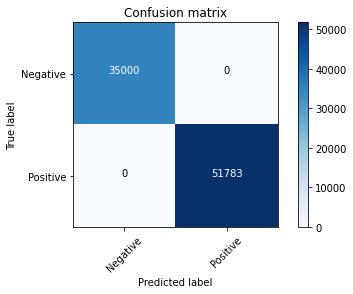

In [91]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_y, pred_y)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [92]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(train_X,train_y)
pred_y = model_3.predict(test_X)
error = mean_squared_error(pred_y,test_y)
rmse = np.sqrt(error)
print(rmse)

0.0


Confusion matrix, without normalization


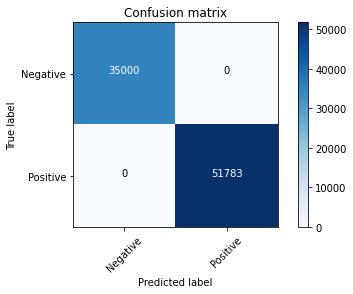

In [93]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_y, pred_y)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [94]:
from sklearn.linear_model import SGDClassifier
model_4 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
model_4.fit(train_X,train_y)
pred_y = model_4.predict(test_X)
error = mean_squared_error(pred_y,test_y)
rmse = np.sqrt(error)
print(rmse)

0.0


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Confusion matrix, without normalization


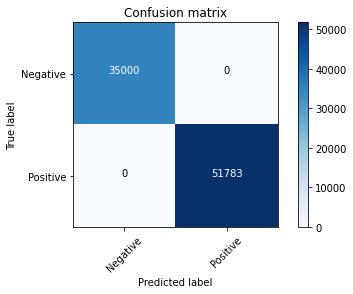

In [95]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_y, pred_y)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [96]:
from sklearn.tree import DecisionTreeClassifier
model_5 = DecisionTreeClassifier()
model_5.fit(train_X,train_y)
pred_y = model_5.predict(test_X)
error = mean_squared_error(pred_y,test_y)
rmse = np.sqrt(error)
print(rmse)

0.0


Confusion matrix, without normalization


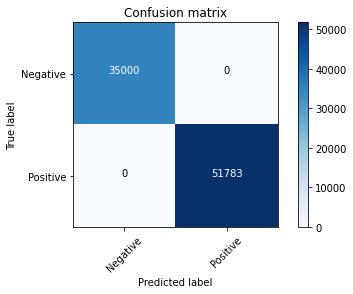

In [97]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_y, pred_y)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [98]:
from sklearn.naive_bayes import BernoulliNB
model_6 = BernoulliNB()
model_6.fit(train_X,train_y)
pred_y = model_6.predict(test_X)
error = mean_squared_error(pred_y,test_y)
rmse = np.sqrt(error)
print(rmse)

0.6350628273784095


Confusion matrix, without normalization


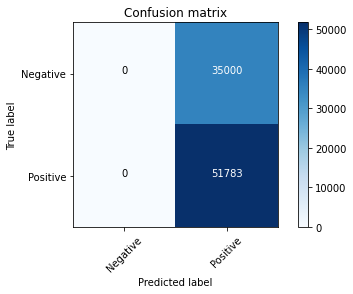

In [99]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_y, pred_y)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [100]:
from sklearn.neighbors import KNeighborsClassifier  
model_7= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model_7.fit(X, y) 
pred_y = model_7.predict(test_X)
error = mean_squared_error(pred_y,test_y)
rmse = np.sqrt(error)
print(rmse)

0.0


Confusion matrix, without normalization


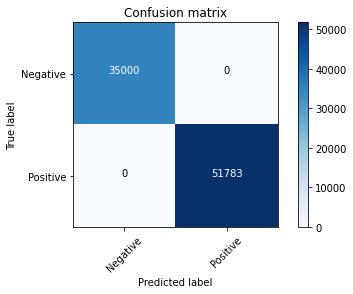

In [101]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_y, pred_y)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [102]:
from sklearn.neighbors import KNeighborsClassifier  
model_7= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model_7.fit(train_X, train_y) 
pred_y = model_7.predict(test_X)
error = mean_squared_error(pred_y,test_y)
rmse = np.sqrt(error)
print(rmse)

0.0


Confusion matrix, without normalization


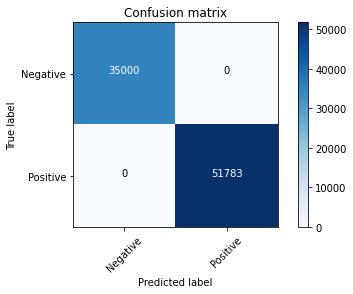

In [103]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_y, pred_y)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

In [105]:
from sklearn.model_selection import cross_val_score


In [106]:
model_2= LogisticRegression(random_state=42)
scores = cross_val_score(model_2, X, y, cv=5, scoring='f1_macro')
print(scores)

[1. 1. 1. 1. 1.]
